In [139]:
#import the libraries
import waterfall_chart
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(10,6)
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [6]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(style="whitegrid")

In [18]:
#read in the data
fortune_wf= pd.read_csv(r'fortune500.csv')

In [19]:
#check the data type
fortune_wf.dtypes

Year                       int64
Rank                       int64
Company                   object
Revenue (in millions)    float64
Profit (in millions)      object
dtype: object

In [20]:
#Get the info
fortune_wf.info('memory=deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25500 non-null  int64  
 1   Rank                   25500 non-null  int64  
 2   Company                25500 non-null  object 
 3   Revenue (in millions)  25500 non-null  float64
 4   Profit (in millions)   25500 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 796.9+ KB


In [23]:
#Rename the column
fortune_wf.columns=['year','rank','company','revenue','profit']

In [24]:
#Check the columns
fortune_wf.columns.values

array(['year', 'rank', 'company', 'revenue', 'profit'], dtype=object)

In [34]:
#Properly convert the year column to datetime
fortune_wf['year']=pd.to_datetime(fortune_wf['year'])

In [77]:
#Remove the N.A.
fortune_useful=fortune_wf[fortune_wf['profit']!='N.A.']

In [78]:
#checke the size of the data again
fortune_useful.shape

(25131, 5)

In [80]:
#Save the cleaned dataset
fortune_useful.to_csv('fortune_neat1.csv',index=False)

In [81]:
#Convert the profit column to float
fortune_useful['profit'].str.replace(r'\D','').astype(int).astype(float)

0         806.0
1        5848.0
2        1954.0
3        2126.0
4         191.0
          ...  
25495     493.0
25496    1754.0
25497     578.0
25498     706.0
25499     584.0
Name: profit, Length: 25131, dtype: float64

In [82]:
#Check the datatype.... Still problematic!
fortune_useful.dtypes

year       datetime64[ns]
rank                int64
company            object
revenue           float64
profit             object
dtype: object

## LASTING SOLUTION TO THE FORTUNE 500 STRING PROBLEM IN THE PROFIT COLUMN

In [155]:
#Read in the data
fortune= pd.read_csv(r'fortune500.csv')

In [156]:
#Check the data
fortune.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [157]:
#Check the datatype
fortune.dtypes

Year                       int64
Rank                       int64
Company                   object
Revenue (in millions)    float64
Profit (in millions)      object
dtype: object

In [158]:
#Check the length
len(fortune)

25500

In [159]:
#Just another way to check the length
fortune.shape[0]

25500

In [160]:
# Rename the columns to shorter names at a go
fortune.columns=['year','rank','company','revenue','profit']

In [161]:
#Get the N.A. values using Regular Expressions
non_numeric_profits= fortune.profit.str.contains('[^0-9.-]')

In [162]:
#Check the N.A. values
fortune.loc[non_numeric_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [163]:
#Check the set of the N.A. value- We can see they are just N.A.s
set(fortune.profit[non_numeric_profits])

{'N.A.'}

In [164]:
#Check the length of the N.A. values
len(fortune.profit[non_numeric_profits])

369

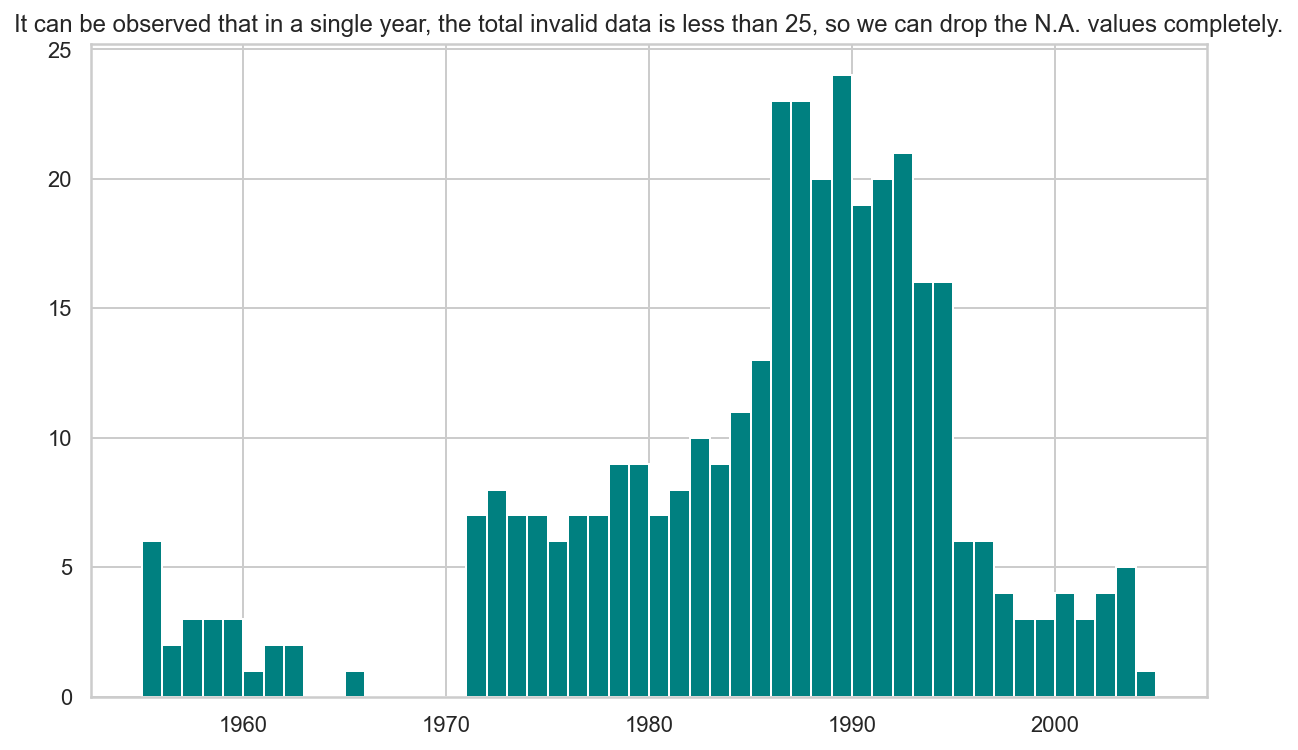

In [165]:
#Check the distribution of the data
bin_sizes,_,_=plt.hist(fortune.year[non_numeric_profits], bins=range(1955,2006),color='teal')
plt.title('It can be observed that in a single year, the total invalid data is less than 25, so we can drop the N.A. values completely.');

In [168]:
#Get the numeric values and ensure they are indeed numeric
fortune= fortune.loc[~non_numeric_profits]
fortune.profit=fortune.profit.apply(pd.to_numeric)

In [169]:
#Check the length of the numeric values
len(fortune)

25131

In [170]:
#Now check the datatypes after the cleaning
fortune.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [138]:
#Now create a new cleaned data and save as csv
fortune.to_csv('cleaned_fortune500.csv',index=False)

In [210]:
x=fortune.query("year>=1996 ").reset_index().groupby('year')['profit'].sum()

In [211]:
x

year
1996    244007.4
1997    300911.7
1998    324230.4
1999    334334.2
2000    409583.6
2001    443850.2
2002    206205.4
2003     69570.4
2004    445592.7
2005    513466.6
Name: profit, dtype: float64

In [212]:
waterfall_df= pd.DataFrame(x)

In [213]:
waterfall_df.head()

,profit
year,
1996,244007.4
1997,300911.7
1998,324230.4
1999,334334.2
2000,409583.6


## Create the Waterfall Chart

In [214]:
#Add a column of incremental changes by year
deltas= waterfall_df['profit']- waterfall_df['profit'].shift(1, fill_value=0)

In [215]:
waterfall_df['delta']= deltas

In [216]:
waterfall_df.head()

,profit,delta
year,,
1996,244007.4,244007.4
1997,300911.7,56904.3
1998,324230.4,23318.7
1999,334334.2,10103.8
2000,409583.6,75249.4


In [217]:
waterfall_df.tail(3)

,profit,delta
year,,
2003,69570.4,-136635.0
2004,445592.7,376022.3
2005,513466.6,67873.9


In [218]:
#Check how many unique years there are
waterfall_df.index.nunique()

10

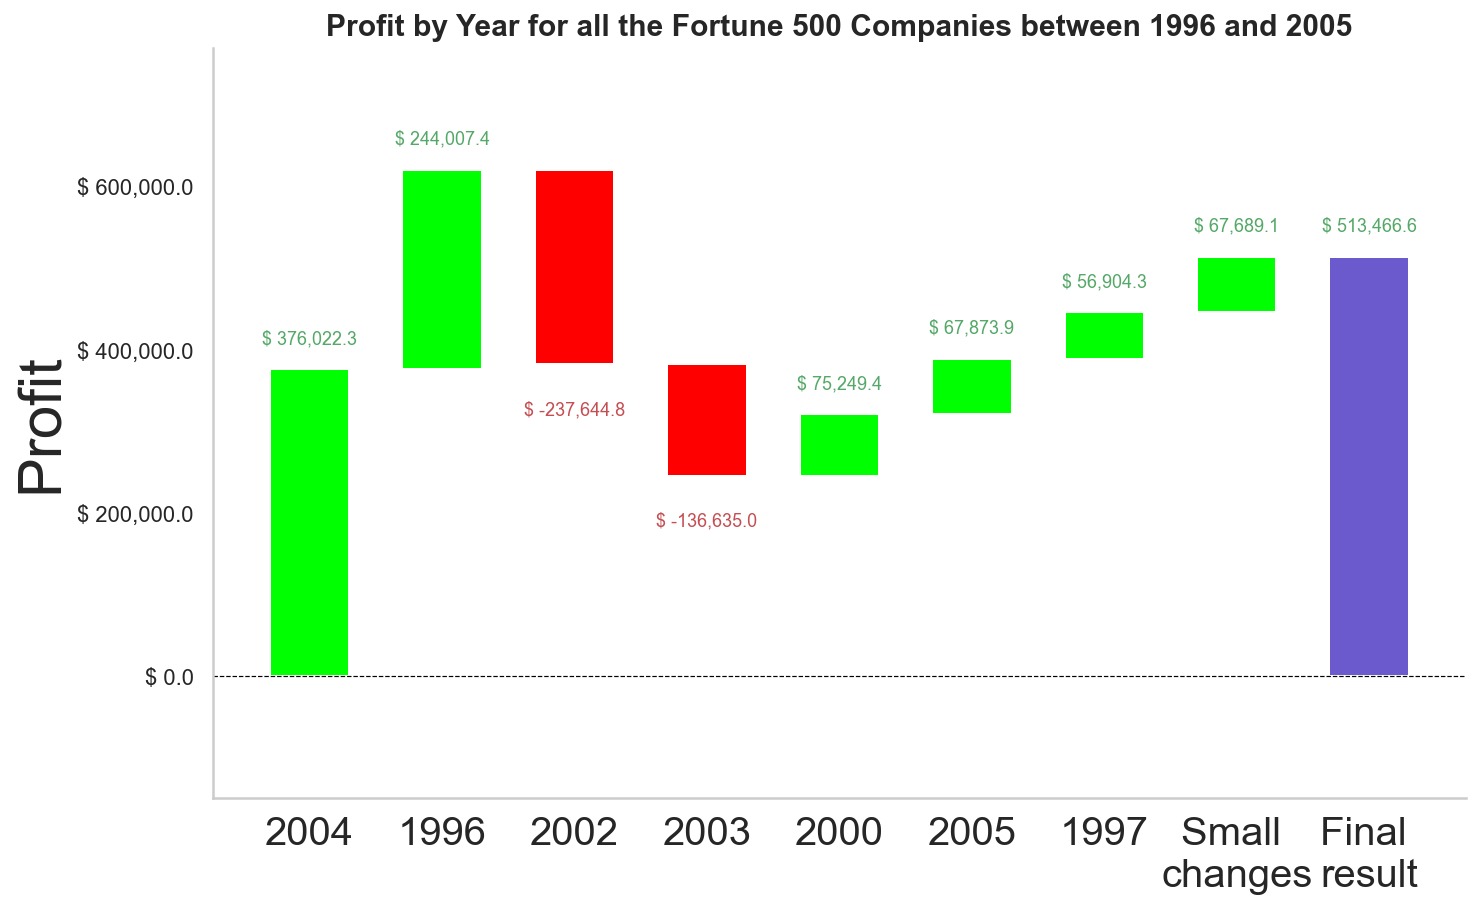

In [225]:
#Plot the chart
waterfall_chart.plot(waterfall_df.index,waterfall_df['delta'],rotation_value=0,sorted_value=True,threshold=0.1,formatting="$ {:,.1f}",net_label='Final \nresult',other_label='Small \nchanges',blue_color='slateblue',green_color='lime',red_color='red')
plt.title('Profit by Year for all the Fortune 500 Companies between 1996 and 2005',fontsize=15,fontweight='bold')
plt.xticks(fontsize=20)
plt.grid(False)
sns.despine()
plt.ylabel('Profit',fontsize=30);